<a href="https://colab.research.google.com/github/legardajuanpablo-byte/DataScienceProjectDegree_JuanPablo_Legarda.ipynb/blob/main/sesiones_practicas/sp_2_JuanPablo_Legarda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)




Medidas de tendencia central
Media: 6.11 ingresos
Mediana: 5.85 ingresos
Moda: 5.7 ingresos


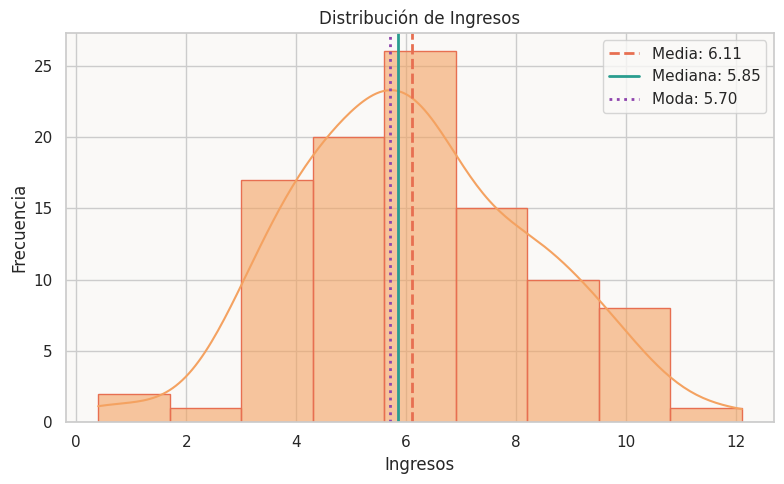

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Estilo distinto (fondo claro y paleta cálida)
sns.set(style="whitegrid", rc={"axes.facecolor": "#faf9f7"})

#  Datos
numero_base = 770674
np.random.seed(numero_base)
media_teorica = (numero_base % 10) + 2
desviacion_estandar = 2
tamaño_muestra = 100

ingresos = np.random.normal(loc=media_teorica, scale=desviacion_estandar, size=tamaño_muestra).round(1)
ingresos = np.where(ingresos < 0, 0, ingresos)

media   = np.mean(ingresos)
mediana = np.median(ingresos)
moda    = stats.mode(ingresos, keepdims=True)[0][0]

print("Medidas de tendencia central")
print(f"Media: {media:.2f} ingresos")
print(f"Mediana: {mediana:.2f} ingresos")
print(f"Moda: {moda:.1f} ingresos")

# Gráfica
fig, ax = plt.subplots(figsize=(8,5))

# Histograma + KDE en una sola línea (como lo que me mostraste)
sns.histplot(
    ingresos,
    bins="fd",                # regla de Freedman–Diaconis
    kde=True,                 # <--- aquí activamos la KDE
    color="#F4A261",
    edgecolor="#E76F51",
    alpha=0.6,
    ax=ax
)

# Líneas verticales
ax.axvline(media,   color="#E76F51", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")
ax.axvline(mediana, color="#2A9D8F", linestyle="-",  linewidth=2, label=f"Mediana: {mediana:.2f}")
ax.axvline(moda,    color="#8E44AD", linestyle=":",  linewidth=2, label=f"Moda: {moda:.2f}")

ax.set_title("Distribución de Ingresos")
ax.set_xlabel("Ingresos")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.tight_layout()
plt.show()


In [11]:
ingresos

array([ 6.9,  5.5,  4.7,  4.8,  8.4,  4.9,  9.7,  7. ,  5.4, 10.7,  5.6,
        8.9,  3. , 12.1,  3.1,  9.5,  7.7,  6.5,  5.4,  5.7,  3.9,  4.9,
        5.5,  6.9,  4.5,  6. ,  8. ,  3.3,  7.6,  6.6,  3. ,  6.7,  5.7,
        5.9,  8.1,  7.9,  9.5,  6.4,  6.5,  6.2,  8.5,  8.5,  9.7,  6.5,
        6.9,  3.8,  5.7,  5.8, 10.4,  9. ,  4.7,  6.2,  5.5,  4. ,  8.2,
        6.8,  8.1,  9.3,  5.7,  3. ,  8.3,  4.1,  6.6,  8.3,  7. ,  5.8,
        3.9,  4.2,  4.4,  7. ,  7.8,  4.5,  5.8,  1. ,  6. ,  5.7,  6.5,
        8.7,  2.7,  4.3,  5. ,  0.4,  3.7,  3.8,  4.5,  4.7,  6.9,  4.5,
        6. ,  6. ,  3.7,  3.1,  4.9,  4.1,  9.5,  5.3,  8.1,  3.6,  9.9,
        5.6])


### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)


</p>
> Añadir blockquote



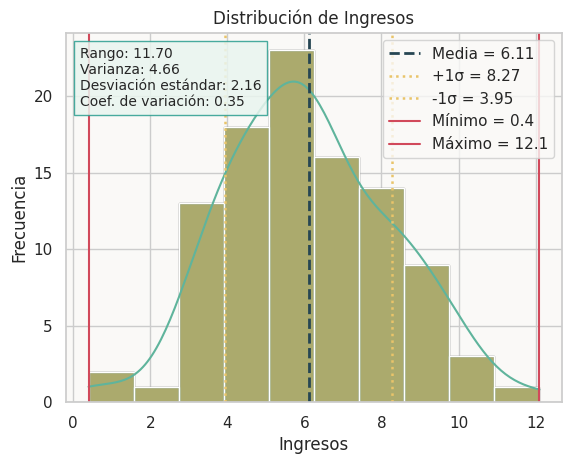

In [31]:
# Cálculo de medidas de dispersión
media = np.mean(ingresos)
minimo = np.min(ingresos)
maximo = np.max(ingresos)
rango = maximo - minimo
varianza = np.var(ingresos, ddof=1)
desviacion = np.std(ingresos, ddof=1)
coef_var = desviacion / media

plt.hist(ingresos, bins=10, edgecolor='#4B4B4B', color='#F9A03F')  # naranja cálido
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')

sns.histplot(ingresos, bins=10, kde=True, color='#5FB49C')  # verde agua

# líneas de referencia con nueva paleta
plt.axvline(media, color='#264653', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(media + desviacion, color='#E9C46A', linestyle=':', linewidth=1.8, label=f'+1σ = {media + desviacion:.2f}')
plt.axvline(media - desviacion, color='#E9C46A', linestyle=':', linewidth=1.8, label=f'-1σ = {media - desviacion:.2f}')
plt.axvline(minimo, color='#D1495B', linestyle='-', linewidth=1.5, label=f'Mínimo = {minimo}')
plt.axvline(maximo, color='#D1495B', linestyle='-', linewidth=1.5, label=f'Máximo = {maximo}')
plt.legend()

from matplotlib.offsetbox import AnchoredText

ax = plt.gca()
texto = (f"Rango: {rango:.2f}\n"
         f"Varianza: {varianza:.2f}\n"
         f"Desviación estándar: {desviacion:.2f}\n"
         f"Coef. de variación: {coef_var:.2f}")

at = AnchoredText(texto, loc="upper left", prop={"size": 10}, frameon=True, borderpad=0.6)
at.patch.set_facecolor("#E9F5EF"); at.patch.set_alpha(0.85); at.patch.set_edgecolor("#2A9D8F")
ax.add_artist(at)




### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd


sns.set_theme(style="whitegrid")

numero_base = 770674
np.random.seed(numero_base)

df = pd.DataFrame({'Ingresos': ingresos})

asimetria = skew(ingresos)
curtosis_valor = kurtosis(ingresos)

print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis_valor:.2f}")

Asimetría: 0.18
Curtosis: -0.05


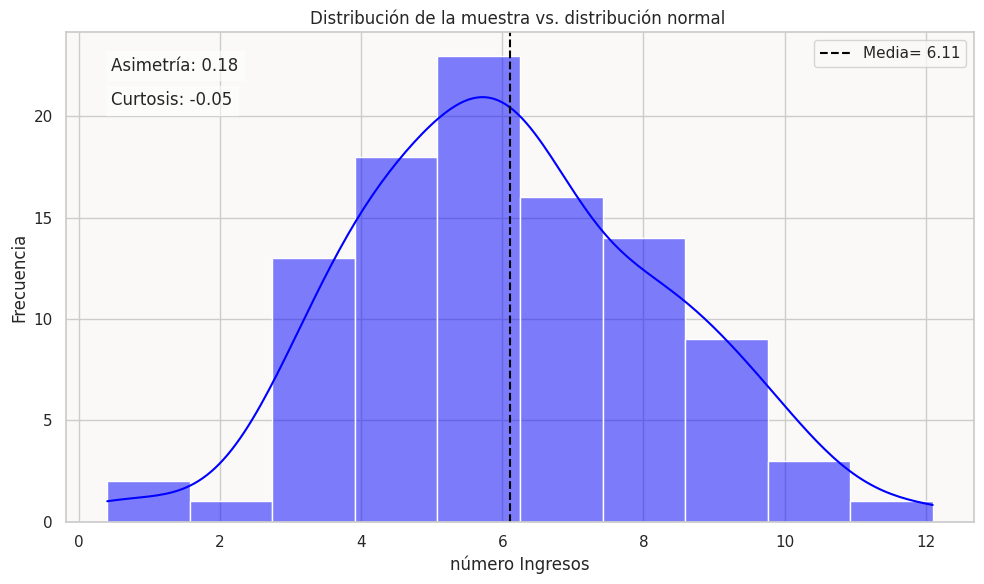

In [32]:
# Visualización
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingresos'], kde=True, color='blue', bins=10)
plt.axvline(df['Ingresos'].mean(), color='black', linestyle='--', label=f'Media= {media:.2f}')

plt.text(0.05, 0.95, f"Asimetría: {asimetria:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.05, 0.88, f"Curtosis: {curtosis_valor:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.title('Distribución de la muestra vs. distribución normal ')
plt.xlabel('número Ingresos')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)



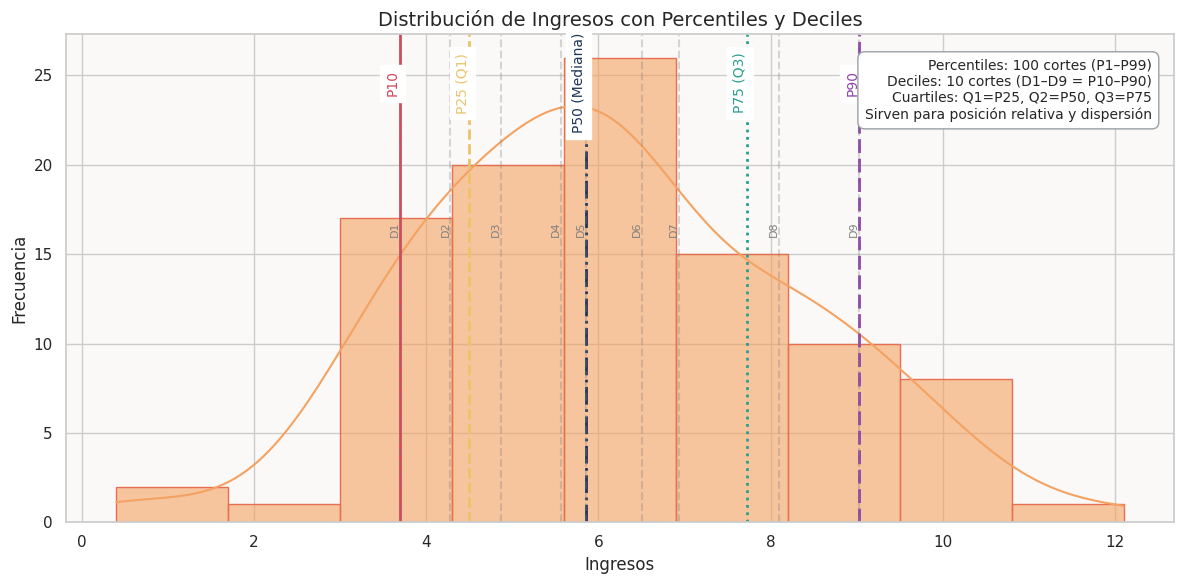

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#faf9f7"})

# --- usa el vector 'ingresos' ya creado en el punto 1 ---

# Percentiles clave (con estilos)
percentiles = {
    'P10':           {'valor': np.percentile(ingresos, 10), 'color': '#D1495B', 'linestyle': '-'},
    'P25 (Q1)':      {'valor': np.percentile(ingresos, 25), 'color': '#E9C46A', 'linestyle': '--'},
    'P50 (Mediana)': {'valor': np.percentile(ingresos, 50), 'color': '#1D3557', 'linestyle': '-.'},
    'P75 (Q3)':      {'valor': np.percentile(ingresos, 75), 'color': '#2A9D8F', 'linestyle': ':'},
    'P90':           {'valor': np.percentile(ingresos, 90), 'color': '#8E44AD', 'linestyle': (0, (5, 2))}
}

# Deciles D1..D9 (P10..P90)
deciles = {f'D{i}': np.percentile(ingresos, i * 10) for i in range(1, 10)}

# --- Visualización
plt.figure(figsize=(12, 6))
sns.histplot(ingresos, kde=True, color='#F4A261', edgecolor='#E76F51', alpha=0.6, bins='fd')

y_top = plt.gca().get_ylim()[1]

# Líneas y etiquetas de percentiles destacados
for etiqueta, props in percentiles.items():
    x = props['valor']
    plt.axvline(x, color=props['color'], linestyle=props['linestyle'], linewidth=2)
    plt.text(x, y_top*0.90, etiqueta, rotation=90, color=props['color'], fontsize=10,
             va='center', ha='right', backgroundcolor='white')

# Líneas sutiles para deciles
for etiqueta, x in deciles.items():
    plt.axvline(x, color='gray', linestyle='--', alpha=0.30)
    plt.text(x, y_top*0.60, etiqueta, rotation=90, color='gray', fontsize=8,
             va='center', ha='right')

# Recuadro interpretativo (anclado al eje, robusto)
texto = (
    "Percentiles: 100 cortes (P1–P99)\n"
    "Deciles: 10 cortes (D1–D9 = P10–P90)\n"
    "Cuartiles: Q1=P25, Q2=P50, Q3=P75\n"
    "Sirven para posición relativa y dispersión"
)
plt.text(0.98, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=10, va='top', ha='right',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="#9AA0A6"))

plt.title("Distribución de Ingresos con Percentiles y Deciles", fontsize=14)
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

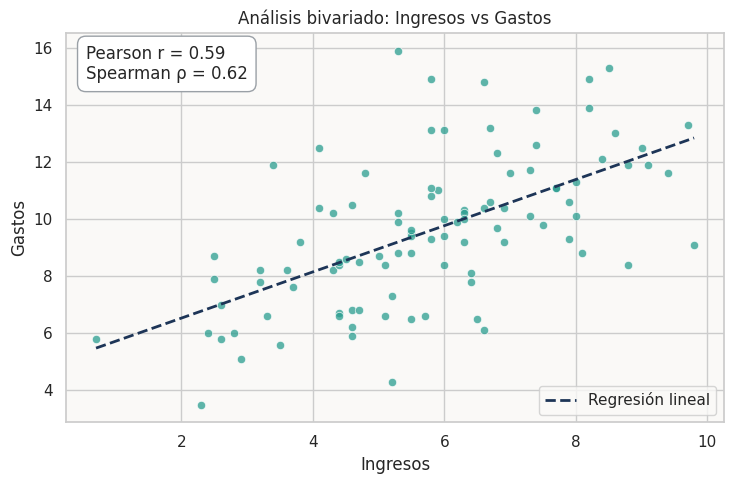

Interpretación: relación positiva moderada (Pearson=0.59). Spearman=0.62 confirma la monotonicidad.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ----------------- Parámetros base (tu cédula)
cedula = 1061770674
base = cedula % 1_000_000        # 770674
np.random.seed(base)
n = 100

# ----------------- Modelo bivariante normal (ambas normales y correlacionadas)
mu_ing,  sigma_ing  = (base % 10) + 2, 2.0         # ~6, 2
mu_gas,  sigma_gas  = mu_ing + 4.0, 2.5            # gastos algo mayores
rho = 0.65                                          # correlación objetivo (moderada-fuerte)

cov = [[sigma_ing**2, rho*sigma_ing*sigma_gas],
       [rho*sigma_ing*sigma_gas, sigma_gas**2]]

muestra = np.random.multivariate_normal([mu_ing, mu_gas], cov, size=n)
ingresos = np.clip(muestra[:, 0], 0, None).round(1)
gastos   = np.clip(muestra[:, 1], 0, None).round(1)

# ----------------- Función de correlaciones
def correlaciones(x, y):
    pearson_r,  _ = stats.pearsonr(x, y)
    spearman_r, _ = stats.spearmanr(x, y)
    return pearson_r, spearman_r

r_pearson, r_spearman = correlaciones(ingresos, gastos)

# ----------------- Visualización
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#faf9f7"})
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.scatter(ingresos, gastos, color="#2A9D8F", alpha=0.75, edgecolor="white", linewidth=0.6)
ax.set_title("Análisis bivariado: Ingresos vs Gastos")
ax.set_xlabel("Ingresos")
ax.set_ylabel("Gastos")

# Línea de regresión (tendencia lineal)
slope, intercept, *_ = stats.linregress(ingresos, gastos)
x_line = np.linspace(ingresos.min(), ingresos.max(), 200)
ax.plot(x_line, intercept + slope*x_line, color="#1D3557", lw=2, ls="--", label="Regresión lineal")

# Cuadro con r de Pearson y ρ de Spearman
texto = f"Pearson r = {r_pearson:.2f}\nSpearman ρ = {r_spearman:.2f}"
ax.text(0.03, 0.97, texto, transform=ax.transAxes, va="top", ha="left",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="#9AA0A6"))

ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ----------------- Interpretación breve en consola
def escala(r):
    a = abs(r)
    if a < 0.2:   return "muy débil"
    if a < 0.4:   return "débil"
    if a < 0.6:   return "moderada"
    if a < 0.8:   return "fuerte"
    return "muy fuerte"

sentido = "positiva" if r_pearson >= 0 else "negativa"
print(f"Interpretación: relación {sentido} {escala(r_pearson)} (Pearson={r_pearson:.2f}). "
      f"Spearman={r_spearman:.2f} confirma la monotonicidad.")

La nube de puntos muestra una relación positiva moderada entre ingresos y gastos: a mayor ingreso, mayor gasto. Los coeficientes Pearson r = 0.59 y Spearman ρ = 0.62 confirman esa asociación; la recta de regresión tiene pendiente positiva, y el modelo lineal explica alrededor de 35% de la variabilidad de los gastos (r²≈0.35).

El ρ ligeramente superior a r sugiere una relación monótona con pequeñas desviaciones de la linealidad. Hay dispersión mayor en niveles altos (heterocedasticidad leve) y algunos puntos alejados, pero no cambian la tendencia. Conclusión: quienes tienen más ingresos tienden a gastar más; no implica causalidad.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

Tabla de contingencia (recuentos):
 Acceso_Internet  No  Sí
Nivel_Educativo        
Básico            6  15
Medio             4  24
Superior          1  10 

Chi2 = 2.404, p-valor = 0.3006, gl = 2
Mínimo esperado: 2.02
Cramér's V = 0.200


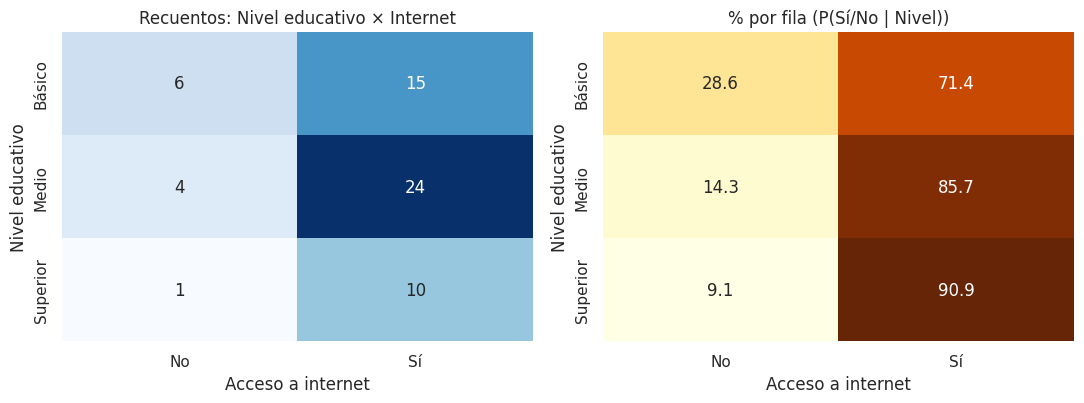

Conclusión (α=0.05): No se rechaza H0 (no hay evidencia de asociación).  Tamaño de efecto (Cramér's V) = 0.20.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from math import sqrt

# Semilla
cedula = 1061770674
base = cedula % 1_000_000         # 770674
np.random.seed(base)

# Simulación
n = 60
niveles  = ["Básico", "Medio", "Superior"]
p_nivel  = [0.35, 0.40, 0.25]                     # distribución educativa
p_inet   = {"Básico": 0.60, "Medio": 0.75, "Superior": 0.90}  # P(Sí|nivel)

nivel_educativo = np.random.choice(niveles, size=n, p=p_nivel)
u = np.random.rand(n)
acceso_internet = np.where(u < [p_inet[nv] for nv in nivel_educativo], "Sí", "No")

df = pd.DataFrame({"Nivel_Educativo": nivel_educativo, "Acceso_Internet": acceso_internet})

# Tabla de contingencia
tabla = pd.crosstab(df["Nivel_Educativo"], df["Acceso_Internet"])
print("Tabla de contingencia (recuentos):\n", tabla, "\n")

#  Chi-cuadrado de independencia
chi2, p, dof, esperados = chi2_contingency(tabla)
print(f"Chi2 = {chi2:.3f}, p-valor = {p:.4f}, gl = {dof}")
print("Mínimo esperado:", esperados.min().round(2))

# Tamaño de efecto: Cramér's V
r, c = tabla.shape
cramer_v = sqrt(chi2 / (tabla.to_numpy().sum() * (min(r, c) - 1)))
print(f"Cramér's V = {cramer_v:.3f}")

# Visualización: recuentos y % por fila
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(11, 4.2))

sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Recuentos: Nivel educativo × Internet")

tabla_rowpct = (tabla.div(tabla.sum(axis=1), axis=0) * 100).round(1)
sns.heatmap(tabla_rowpct, annot=True, fmt=".1f", cmap="YlOrBr", cbar=False, ax=axes[1])
axes[1].set_title("% por fila (P(Sí/No | Nivel))")

for ax in axes:
    ax.set_xlabel("Acceso a internet"); ax.set_ylabel("Nivel educativo")

plt.tight_layout()
plt.show()

# ---------- Interpretación rápida
alpha = 0.05
decision = "Se RECHAZA H0 (hay asociación)" if p < alpha else "No se rechaza H0 (no hay evidencia de asociación)"
print(f"Conclusión (α=0.05): {decision}.  Tamaño de efecto (Cramér's V) = {cramer_v:.2f}.")

Resultado estadístico. Con la prueba χ² no se rechaza H₀ (p > 0.05), por lo que no hay evidencia suficiente de asociación entre nivel educativo y acceso a internet en esta muestra de 60 personas. El tamaño de efecto Cramér’s V = 0.20 sugiere una asociación pequeña–moderada como máximo.

Lectura del mapa. Los porcentajes por fila muestran una tendencia (acceso “Sí”: 71.4% en Básico, 85.7% en Medio, 90.9% en Superior), pero la variación no alcanza significancia con este n. En otras palabras, podría existir una relación débil que esta muestra no logra confirmar. Para mayor poder se podria aumentar el tamaño muestral quizas.